In [1]:
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('data/train_ozone.csv')
test = pd.read_csv('data/test_ozone.csv')
submission = pd.read_csv('submission/submission.csv')

In [4]:
train.shape, test.shape, submission.shape

((1459, 11), (715, 10), (715, 2))

<AxesSubplot:>

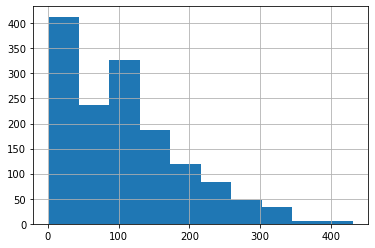

In [5]:
train['count'].hist()

<AxesSubplot:>

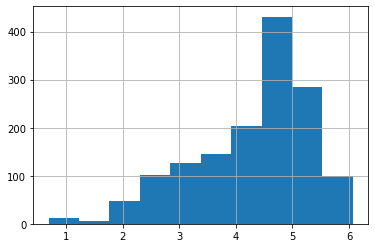

In [6]:
y_log_transform = np.log1p(train['count'])
y_log_transform.hist()

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 
            'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']
X_train = train[features]
y_train = y_log_transform
X_test = test[features]

In [12]:
model100 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 1, max_depth = 16, min_samples_split=2, 
                                 random_state = 0) 

model100.fit(X_train, y_train)

ypred = model100.predict(X_test)

In [13]:
submission['count'] = np.expm1(ypred)
submission.to_csv("RFR_ozone_parameter10_experi.csv", index = False)